In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

e:\coodingtool\python\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\coodingtool\python\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\coodingtool\python\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
e:\coodingtool\python\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1)

In [2]:
table=pd.read_excel("Shrinkage Data for HKU updated 5_4.xlsx")
table.head()

,gf_id\n品种ID,gf_no\n品种号,PPO_no\nPPO号,fabric_no\n布号,send_no\n送布单号,warp_shrinkage\n经向缩率,weft_shrinkage\n纬向缩率,wash_method\n洗水方法,test_date\n测试时间,Fabric_Type\n织法,Warp_Type\n经纱纱型,Weft_Type\n纬纱纱型,Warp_Count\n经纱支,Weft_Count\n纬纱支,Warp_Density\n经纱密度,Weft_Density\n纬纱密度,Finishing_Method\n整理方法,GEW STD warp\nGEW经向缩率审单标准,GEW STD weft\nGEW纬向缩率审单标准,Mercerizing\n丝光碱浓
0,487543,PC5050-1P1856,PWGF18YF025040R,N21035610004,FG1803250129,-0.80,-0.60,GW,2018-04-02 09:24:47,P,CF+JC,CF+JC,50+100/2,50,120,100,1+,2.0,2.0,24BE
1,487575,PC5050-1P1866,PWGF18YF025040R,N21019210003,FG1803120005,0.03,-0.87,GW,2018-03-21 09:31:55,P,CF+JC,CF+JC,50+100/2,50,120,100,1+,2.0,2.0,24BE
2,483606,OC4020-1P0576,PWGF17YF024380B,MC2012010003,FG1801210063,0.50,-1.37,GW,2018-01-23 15:17:41,O,JC+CF,JC,40+80/2,20,110,54,1+,2.0,2.0,18BE
3,502868,CC5050-1P7899,PWGF17YF029756A,N10312120003,FG1801220103,0.70,-1.13,GW,2018-01-27 17:01:04,C,JC+CF,JC+CF,50+100/2,50,150,126,1+,2.0,2.0,24BE
4,502869,CC5050-1P7897,PWGF17YF029756A,N10313620001,FG1801310068,-1.00,-0.60,GW,2018-02-05 15:39:12,C,JC,JC,50,50,150,126,1+,2.0,2.0,24BE


In [3]:
drop_cols1=['gf_id\n品种ID','gf_no\n品种号','PPO_no\nPPO号','fabric_no\n布号','send_no\n送布单号','test_date\n测试时间']
data=table.drop(drop_cols1,axis=1)
data.head()

,warp_shrinkage\n经向缩率,weft_shrinkage\n纬向缩率,wash_method\n洗水方法,Fabric_Type\n织法,Warp_Type\n经纱纱型,Weft_Type\n纬纱纱型,Warp_Count\n经纱支,Weft_Count\n纬纱支,Warp_Density\n经纱密度,Weft_Density\n纬纱密度,Finishing_Method\n整理方法,GEW STD warp\nGEW经向缩率审单标准,GEW STD weft\nGEW纬向缩率审单标准,Mercerizing\n丝光碱浓
0,-0.80,-0.60,GW,P,CF+JC,CF+JC,50+100/2,50,120,100,1+,2.0,2.0,24BE
1,0.03,-0.87,GW,P,CF+JC,CF+JC,50+100/2,50,120,100,1+,2.0,2.0,24BE
2,0.50,-1.37,GW,O,JC+CF,JC,40+80/2,20,110,54,1+,2.0,2.0,18BE
3,0.70,-1.13,GW,C,JC+CF,JC+CF,50+100/2,50,150,126,1+,2.0,2.0,24BE
4,-1.00,-0.60,GW,C,JC,JC,50,50,150,126,1+,2.0,2.0,24BE


In [4]:
wash_method_dummpy = pd.get_dummies(data['wash_method\n洗水方法'],drop_first=False,prefix='wash_method')
Fabric_Type_dummpy = pd.get_dummies(data['Fabric_Type\n织法'],drop_first=False,prefix='Fabric_Type')
Warp_Type_dummpy = pd.get_dummies(data['Warp_Type\n经纱纱型'],drop_first=False,prefix='Warp_Type')
Weft_Type_dummpy = pd.get_dummies(data['Weft_Type\n纬纱纱型'],drop_first=False,prefix='Weft_Type')
Warp_Count_dummpy = pd.get_dummies(data['Warp_Count\n经纱支'],drop_first=False,prefix='Warp_Count')
Weft_Count_dummpy = pd.get_dummies(data['Weft_Count\n纬纱支'],drop_first=False,prefix='Weft_Count')
Finishing_Method_dummpy = pd.get_dummies(data['Finishing_Method\n整理方法'],drop_first=False,prefix='Finishing_Method')
Mercerizing_dummpy = pd.get_dummies(data['Mercerizing\n丝光碱浓'],drop_first=False,prefix='Mercerizing')
dummpy_data = pd.concat([wash_method_dummpy, Fabric_Type_dummpy, Warp_Type_dummpy, Weft_Type_dummpy, Warp_Count_dummpy, Weft_Count_dummpy,Finishing_Method_dummpy,Mercerizing_dummpy], axis =1)
dummpy_data.head()

,wash_method_ABGA,wash_method_AGWA,wash_method_BGW,wash_method_BIP,wash_method_BSR,wash_method_CGK,wash_method_CHW,wash_method_COWA,wash_method_CSD,wash_method_CSW,...,Finishing_Method_95+169+171+,Finishing_Method_95+171+,Finishing_Method_98+,Finishing_Method_98+155+,Mercerizing_14BE,Mercerizing_18BE,Mercerizing_20BE,Mercerizing_24BE,Mercerizing_28BE,Mercerizing_不丝光
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
drop_cols2=['wash_method\n洗水方法','Fabric_Type\n织法','Warp_Type\n经纱纱型','Weft_Type\n纬纱纱型','Warp_Count\n经纱支','Weft_Count\n纬纱支','Finishing_Method\n整理方法','Mercerizing\n丝光碱浓']
data=data.drop(drop_cols2,axis=1)

In [6]:
newdata = pd.concat([data,dummpy_data],axis =1)
newdata.head()

,warp_shrinkage\n经向缩率,weft_shrinkage\n纬向缩率,Warp_Density\n经纱密度,Weft_Density\n纬纱密度,GEW STD warp\nGEW经向缩率审单标准,GEW STD weft\nGEW纬向缩率审单标准,wash_method_ABGA,wash_method_AGWA,wash_method_BGW,wash_method_BIP,...,Finishing_Method_95+169+171+,Finishing_Method_95+171+,Finishing_Method_98+,Finishing_Method_98+155+,Mercerizing_14BE,Mercerizing_18BE,Mercerizing_20BE,Mercerizing_24BE,Mercerizing_28BE,Mercerizing_不丝光
0,-0.80,-0.60,120,100,2.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.03,-0.87,120,100,2.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.50,-1.37,110,54,2.0,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.70,-1.13,150,126,2.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.00,-0.60,150,126,2.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
#split the train dataset and test dataset
original= newdata.values
Y1 = original[:,0]
Y2 = original[:,1]
diff_set = list(set(range(original.shape[1])) - set([0,1]))
X = original[:,diff_set]
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y1,test_size=0.2, random_state=1234)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X, Y2,test_size=0.2, random_state=1234)
X_train_1.shape
x_data = X_train_1
y_data = Y_train_1.reshape((-1,1))

In [12]:
#模型调参#
#参数选择
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
input_size=X_train.shape[1]
output_size=1
data_size=X_train.shape[0]
batch_size=500
width_list = [5,10,20] 
depth_list = range(5,9)#5-10
lr_list = [0.002,0.003,0.004]
x=tf.placeholder(tf.float32,shape=(None,input_size))
y=tf.placeholder(tf.float32,shape=(None,output_size))
def networks(x,depth,width):
    w_input=tf.Variable(tf.random_normal([input_size,width_size],stddev=1))
    w_hidden=tf.Variable(tf.random_normal([width_size,width_size],stddev=1))
    b_hidden=tf.Variable(tf.zeros([1,width_size],dtype=tf.float32))
    w_output=tf.Variable(tf.random_normal([width_size,output_size],stddev=1))
    h=tf.matmul(x,w_input)+b_hidden
    for _ in range(depth):
        h=tf.matmul(h,w_hidden)+b_hidden
    y_pred=tf.matmul(h,w_output)
    return y_pred
for depth_size in depth_list:
    for width_size in width_list:
        for learning_rate in lr_list:
            y_pred = networks(x, depth_size, width_size)
            MSE_loss=tf.reduce_mean(tf.square(y-y_pred))
            train_step=tf.train.AdamOptimizer(learning_rate).minimize(MSE_loss)
            saver = tf.train.Saver()
            with tf.Session() as sess:
                init_op=tf.global_variables_initializer()
                sess.run(init_op)
                STEPS = 10000
                for i in range(STEPS):
                    start = max((i * batch_size) % 1000,20)
                    end = min(start + batch_size, 1000) 
                    sess.run(train_step,feed_dict={x:x_data[start:end],y:y_data[start:end]})
                MSE = sess.run(MSE_loss, feed_dict={x:x_data[start:end],y:y_data[start:end]})
                print('lr为：',learning_rate, 'depth:',depth_size, 'width:', width_size,'MSE:', MSE)

Instructions for updating:
Colocations handled automatically by placer.
lr为： 0.002 depth: 5 width: 5 MSE: 0.8955225
lr为： 0.003 depth: 5 width: 5 MSE: 66.271866
lr为： 0.004 depth: 5 width: 5 MSE: 137.0532
lr为： 0.002 depth: 5 width: 10 MSE: 214.47467
lr为： 0.003 depth: 5 width: 10 MSE: 52.962494
lr为： 0.004 depth: 5 width: 10 MSE: 10467.906
lr为： 0.002 depth: 5 width: 20 MSE: 7463.3535
lr为： 0.003 depth: 5 width: 20 MSE: 17249456.0
lr为： 0.004 depth: 5 width: 20 MSE: 4646.05
lr为： 0.002 depth: 6 width: 5 MSE: 4456.816
lr为： 0.003 depth: 6 width: 5 MSE: 1.3169631
lr为： 0.004 depth: 6 width: 5 MSE: 0.6625451
lr为： 0.002 depth: 6 width: 10 MSE: 1895.157
lr为： 0.003 depth: 6 width: 10 MSE: 706.30176
lr为： 0.004 depth: 6 width: 10 MSE: 556.76105
lr为： 0.002 depth: 6 width: 20 MSE: 367254.25
lr为： 0.003 depth: 6 width: 20 MSE: 683888.94
lr为： 0.004 depth: 6 width: 20 MSE: 60530.785
lr为： 0.002 depth: 7 width: 5 MSE: 82.55134
lr为： 0.003 depth: 7 width: 5 MSE: 30.243732
lr为： 0.004 depth: 7 width: 5 MSE: 1219.05

In [13]:
#construct the network
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
input_size=X_train.shape[1]
output_size=1
data_size=X_train.shape[0]
batch_size=500
width_size= 5
depth_size=6
x=tf.placeholder(tf.float32,shape=(None,input_size))
y=tf.placeholder(tf.float32,shape=(None,output_size))
def networks(x,depth,width):
    w_input=tf.Variable(tf.random_normal([input_size,width_size],stddev=1,seed=1))
    w_hidden=tf.Variable(tf.random_normal([width_size,width_size],stddev=1,seed=1))
    b_hidden=tf.Variable(tf.zeros([1,width_size],dtype=tf.float32))
    w_output=tf.Variable(tf.random_normal([width_size,output_size],stddev=1,seed=1))
    h=tf.matmul(x,w_input)+b_hidden
    for _ in range(depth):
        h=tf.matmul(h,w_hidden)+b_hidden
    y_pred=tf.matmul(h,w_output)
    return y_pred
y_pred = networks(x, depth_size, width_size)
learning_rate=4e-3
cross_entropy=tf.reduce_mean(tf.square(y-y_pred))
train_step=tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
saver = tf.train.Saver()

In [14]:
#training process  for warp_shrinkage
x_data = X_train
y_data = Y_train_1.reshape((-1,1))
with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 100000
    error = []
    mean_list = []
    std_list = []
    for i in range(STEPS):
        start = max((i * batch_size) % 1000,20)
        end = min(start + batch_size, 1000) 
        sess.run(train_step,feed_dict={x:x_data[start:end],y:y_data[start:end]})
        if i % 100 == 0:
            total_cross_entropy = sess.run(cross_entropy,
                                           feed_dict={x: x_data[start:end], y:y_data[start:end]})
            print('训练%d次后，误差为%f' % (i, total_cross_entropy))
            error.append(total_cross_entropy)
            predict = sess.run(y_pred, feed_dict={x: x_data[start:end]})
            mean_list.append(np.mean(predict))
            std_list.append(np.std(predict))
    file_path="./test"
    save_path = saver.save(sess, file_path)
    predict = sess.run(y_pred, feed_dict={x: x_data})
    test_predict = sess.run(y_pred, feed_dict={x: X_test_1})

训练0次后，误差为31267401728.000000
训练100次后，误差为92115320.000000
训练200次后，误差为16100742.000000
训练300次后，误差为11724468.000000
训练400次后，误差为9423642.000000
训练500次后，误差为7429528.500000
训练600次后，误差为5749477.500000
训练700次后，误差为4377917.000000
训练800次后，误差为3284427.750000
训练900次后，误差为2428393.000000
训练1000次后，误差为1768293.875000
训练1100次后，误差为1266477.250000
训练1200次后，误差为890811.187500
训练1300次后，误差为614648.312500
训练1400次后，误差为415991.375000
训练1500次后，误差为276692.468750
训练1600次后，误差为181839.359375
训练1700次后，误差为119316.703125
训练1800次后，误差为79542.132812
训练1900次后，误差为55177.503906
训练2000次后，误差为40831.785156
训练2100次后，误差为32718.000000
训练2200次后，误差为28305.513672
训练2300次后，误差为25983.556641
训练2400次后，误差为24779.300781
训练2500次后，误差为24136.550781
训练2600次后，误差为23754.416016
训练2700次后，误差为23481.800781
训练2800次后，误差为23244.941406
训练2900次后，误差为23013.060547
训练3000次后，误差为22774.859375
训练3100次后，误差为22526.187500
训练3200次后，误差为22266.513672
训练3300次后，误差为21996.169922
训练3400次后，误差为21716.255859
训练3500次后，误差为21426.935547
训练3600次后，误差为21128.187500
训练3700次后，误差为20820.474609
训练3800次后，误差为20504.535156


训练34900次后，误差为2.236630
训练35000次后，误差为2.128167
训练35100次后，误差为2.018538
训练35200次后，误差为1.919636
训练35300次后，误差为1.823047
训练35400次后，误差为1.757652
训练35500次后，误差为1.588941
训练35600次后，误差为9.217310
训练35700次后，误差为0.948937
训练35800次后，误差为0.925549
训练35900次后，误差为1.311085
训练36000次后，误差为0.899104
训练36100次后，误差为2.503521
训练36200次后，误差为1.229323
训练36300次后，误差为0.844450
训练36400次后，误差为0.916039
训练36500次后，误差为0.819801
训练36600次后，误差为5.178020
训练36700次后，误差为0.800939
训练36800次后，误差为0.790233
训练36900次后，误差为0.780734
训练37000次后，误差为0.772439
训练37100次后，误差为0.764930
训练37200次后，误差为0.758202
训练37300次后，误差为1.944236
训练37400次后，误差为0.754352
训练37500次后，误差为0.753982
训练37600次后，误差为1.336313
训练37700次后，误差为0.887510
训练37800次后，误差为0.751103
训练37900次后，误差为0.723729
训练38000次后，误差为1.805015
训练38100次后，误差为0.721113
训练38200次后，误差为0.715742
训练38300次后，误差为24.961590
训练38400次后，误差为0.723609
训练38500次后，误差为0.719639
训练38600次后，误差为0.730497
训练38700次后，误差为1.666426
训练38800次后，误差为0.851613
训练38900次后，误差为0.727454
训练39000次后，误差为0.753900
训练39100次后，误差为0.844182
训练39200次后，误差为0.750866
训练39300次后，误差为0.765574
训练39400次后

训练72200次后，误差为0.627170
训练72300次后，误差为0.627136
训练72400次后，误差为0.627082
训练72500次后，误差为0.627043
训练72600次后，误差为0.626996
训练72700次后，误差为0.626939
训练72800次后，误差为0.626894
训练72900次后，误差为0.626853
训练73000次后，误差为0.626807
训练73100次后，误差为0.626761
训练73200次后，误差为0.626709
训练73300次后，误差为0.626665
训练73400次后，误差为0.626628
训练73500次后，误差为0.626587
训练73600次后，误差为0.626545
训练73700次后，误差为0.626516
训练73800次后，误差为0.626492
训练73900次后，误差为0.626472
训练74000次后，误差为0.626454
训练74100次后，误差为0.626432
训练74200次后，误差为0.626436
训练74300次后，误差为0.626466
训练74400次后，误差为0.626509
训练74500次后，误差为0.626596
训练74600次后，误差为0.626825
训练74700次后，误差为0.626346
训练74800次后，误差为0.628917
训练74900次后，误差为0.626365
训练75000次后，误差为0.626527
训练75100次后，误差为0.626826
训练75200次后，误差为0.667423
训练75300次后，误差为0.626046
训练75400次后，误差为0.626250
训练75500次后，误差为0.626385
训练75600次后，误差为0.626273
训练75700次后，误差为0.817661
训练75800次后，误差为0.626072
训练75900次后，误差为0.626102
训练76000次后，误差为0.626191
训练76100次后，误差为0.626386
训练76200次后，误差为0.626226
训练76300次后，误差为0.690246
训练76400次后，误差为0.625861
训练76500次后，误差为0.625904
训练76600次后，误差为0.625952
训练76700次后，

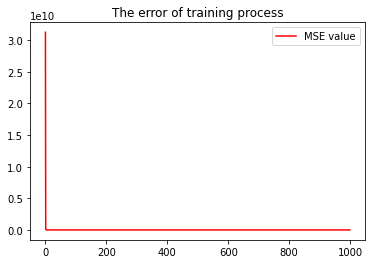

In [16]:
#the training error figure
s = range(1000)
plt.plot(s,error,color="red",label = "MSE value")
plt.legend()
plt.title('The error of training process')
plt.show()

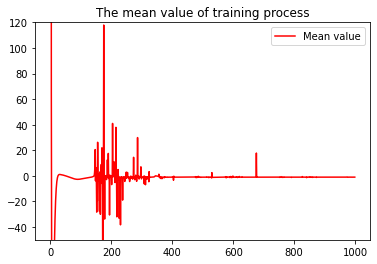

In [20]:
s = range(1000)
plt.plot(s,mean_list,color="red",label = "Mean value")
plt.ylim((-50, 120))
plt.legend()
plt.title('The mean value of training process')
plt.show()

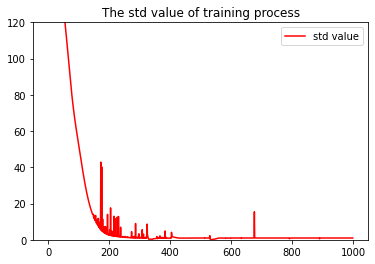

In [26]:
s = range(1000)
plt.plot(s,std_list,color="red",label = "std value")
plt.ylim((0, 120))
plt.legend()
plt.title('The std value of training process')
plt.show()

In [27]:
#the mean of train datasets
print('the predicted mean value of train datasets is ',np.mean(predict))
print('the predicted std value of train datasets is ',np.std(predict))
print('the predicted mean value of test datasets is ',np.mean(test_predict))
print('the predicted std value of test datasets is ',np.std(test_predict))

the predicted mean value of train datasets is  -1.0885172
the predicted std value of train datasets is  1.0789399
the predicted mean value of test datasets is  -1.0839702
the predicted std value of test datasets is  1.0644951


In [28]:
print('the groundtruth mean value of train datasets is ',np.mean(Y_train_1))
print('the groundtruth std value of train datasets is ',np.std(Y_train_1))
print('the groundtruth mean value of test datasets is ',np.mean(Y_test_1))
print('the groundtruth std value of test datasets is ',np.std(Y_test_1))

the groundtruth mean value of train datasets is  -1.1219961515134809
the groundtruth std value of train datasets is  1.2845598193671337
the groundtruth mean value of test datasets is  -1.1386154728299223
the groundtruth std value of test datasets is  1.2728678541335832


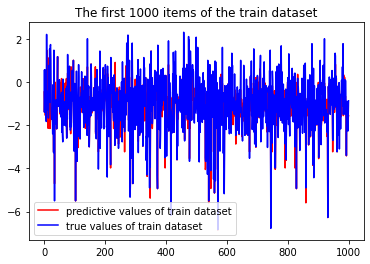

In [30]:
#results display
predict=predict.ravel()
orange=y_data.ravel()
t = np.arange(1000)
plt.plot(t,predict[0:1000],color="red",label='predictive values of train dataset')
plt.plot(t,orange[0:1000],color="blue",label='true values of train dataset')
plt.legend()
plt.title('The first 1000 items of the train dataset')
plt.show()

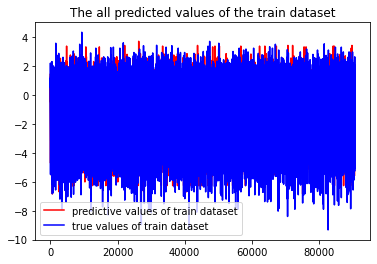

In [31]:
t = np.arange(data_size)
plt.plot(t,predict,color="red",label='predictive values of train dataset')
plt.plot(t,orange,color="blue",label='true values of train dataset')
plt.legend()
plt.title('The all predicted values of the train dataset')
plt.show()

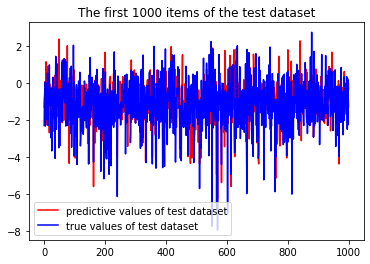

In [32]:
#test dataset results display
y_test_true = Y_test_1.ravel()
t = np.arange(1000)
plt.plot(t,test_predict[0:1000],color="red",label='predictive values of test dataset')
plt.plot(t,y_test_true[0:1000],color="blue",label='true values of test dataset')
plt.legend()
plt.title('The first 1000 items of the test dataset')
plt.show()

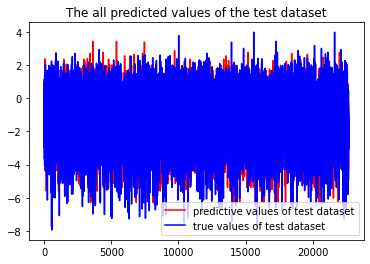

In [33]:
t = np.arange(Y_test_1.shape[0])
plt.plot(t,test_predict,color="red",label='predictive values of test dataset')
plt.plot(t,y_test_true,color="blue",label='true values of test dataset')
plt.legend()
plt.title('The all predicted values of the test dataset')
plt.show()

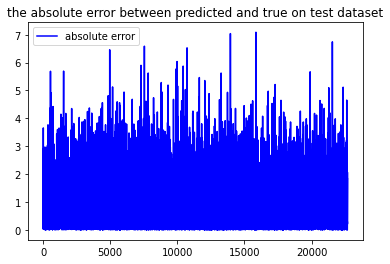

In [34]:
t = np.arange(Y_test_1.shape[0])
abs_error = np.abs(Y_test_1.ravel() - test_predict.ravel())
plt.plot(t,abs_error,color = "blue", label = "absolute error")
plt.legend()
plt.title("the absolute error between predicted and true on test dataset")
plt.show()

In [35]:
train_pred_mean = np.mean(predict)
train_pred_std = np.std(predict)
train_true_mean = np.mean(Y_train_1)
train_true_std = np.std(Y_train_1)
print(train_pred_mean,train_pred_std)
print(train_true_mean,train_true_std)

-1.0885172 1.0789399
-1.1219961515134809 1.2845598193671337


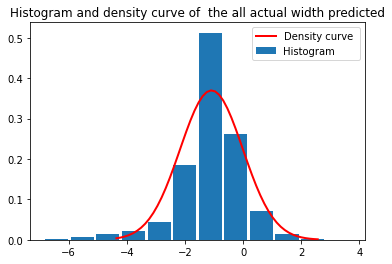

In [36]:
import scipy.stats as st 
s=np.random.normal(train_pred_mean, train_pred_std, 500)
s_fit = np.linspace(s.min(), s.max())
plt.plot(s_fit, st.norm(train_pred_mean, train_pred_std).pdf(s_fit), lw=2, c='r',label = "Density curve ")
plt.hist(predict,bins=12,rwidth =0.9,density=True,label = "Histogram")
plt.title("Histogram and density curve of  the all actual width predicted")
plt.legend()
plt.show()

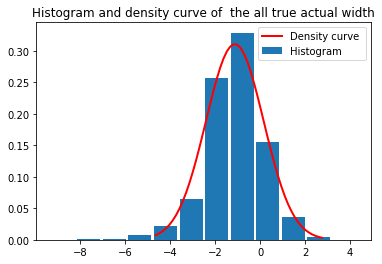

In [38]:
s=np.random.normal(train_true_mean, train_true_std, 500)
s_fit = np.linspace(s.min(), s.max())
plt.plot(s_fit, st.norm(train_true_mean,  train_true_std).pdf(s_fit), lw=2, c='r',label = "Density curve ")
plt.hist(Y_train_1,bins=12,rwidth =0.9,density=True,label = "Histogram")
plt.title("Histogram and density curve of  the all true actual width")
plt.legend()
plt.show()

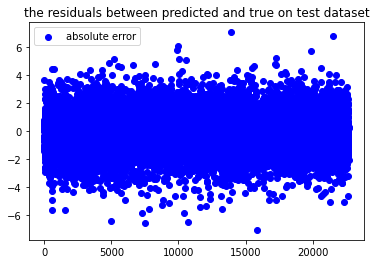

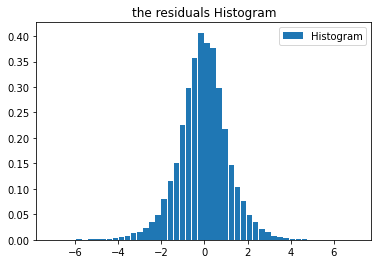

In [39]:
t = np.arange(Y_test_1.shape[0])
residuals = Y_test_1.ravel()-test_predict.ravel()
plt.scatter(t,residuals,color = "blue", label = "absolute error")
plt.legend()
plt.title("the residuals between predicted and true on test dataset")
plt.show()
plt.hist(residuals, bins=50,rwidth =0.9,density=True, label = "Histogram" )
plt.legend()
plt.title("the residuals Histogram")
plt.show()

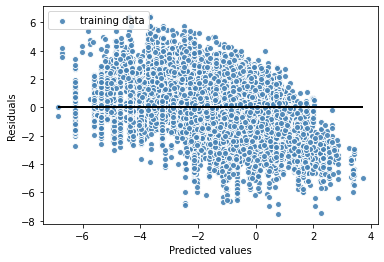

In [40]:
#残差分布图  r
plt.scatter(predict,Y_train_1-predict, c='steelblue',edgecolor='white',marker='o',alpha=0.9, label='training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=predict.min(), xmax=predict.max(), lw=2, color='black')
plt.show()

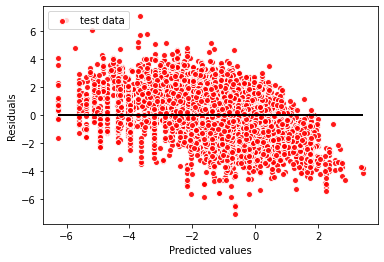

In [41]:
#残差分布图  r
plt.scatter(test_predict,Y_test_1.ravel()-test_predict.ravel(), c='red',edgecolor='white',marker='o',alpha=0.9, label='test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=test_predict.min(), xmax=test_predict.max(), lw=2, color='black')
plt.show()

#以下对于weft_shrinkage预测

In [42]:
x_data = X_train_2
y_data = Y_train_2.reshape((-1,1))
#模型调参#
#参数选择
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
input_size=X_train.shape[1]
output_size=1
data_size=X_train.shape[0]
batch_size=500
width_list = [5,10,20] 
depth_list = range(5,9)#5-10
lr_list = [0.002,0.003,0.004]
x=tf.placeholder(tf.float32,shape=(None,input_size))
y=tf.placeholder(tf.float32,shape=(None,output_size))
def networks(x,depth,width):
    w_input=tf.Variable(tf.random_normal([input_size,width_size],stddev=1))
    w_hidden=tf.Variable(tf.random_normal([width_size,width_size],stddev=1))
    b_hidden=tf.Variable(tf.zeros([1,width_size],dtype=tf.float32))
    w_output=tf.Variable(tf.random_normal([width_size,output_size],stddev=1))
    h=tf.matmul(x,w_input)+b_hidden
    for _ in range(depth):
        h=tf.matmul(h,w_hidden)+b_hidden
    y_pred=tf.matmul(h,w_output)
    return y_pred
for depth_size in depth_list:
    for width_size in width_list:
        for learning_rate in lr_list:
            y_pred = networks(x, depth_size, width_size)
            MSE_loss=tf.reduce_mean(tf.square(y-y_pred))
            train_step=tf.train.AdamOptimizer(learning_rate).minimize(MSE_loss)
            saver = tf.train.Saver()
            with tf.Session() as sess:
                init_op=tf.global_variables_initializer()
                sess.run(init_op)
                STEPS = 10000
                for i in range(STEPS):
                    start = max((i * batch_size) % 1000,20)
                    end = min(start + batch_size, 1000) 
                    sess.run(train_step,feed_dict={x:x_data[start:end],y:y_data[start:end]})
                MSE = sess.run(MSE_loss, feed_dict={x:x_data[start:end],y:y_data[start:end]})
                print('lr为：',learning_rate, 'depth:',depth_size, 'width:', width_size,'MSE:', MSE)

lr为： 0.002 depth: 5 width: 5 MSE: 237.2101
lr为： 0.003 depth: 5 width: 5 MSE: 0.7291495
lr为： 0.004 depth: 5 width: 5 MSE: 0.9478887
lr为： 0.002 depth: 5 width: 10 MSE: 1250.7861
lr为： 0.003 depth: 5 width: 10 MSE: 219096.92
lr为： 0.004 depth: 5 width: 10 MSE: 591.4407
lr为： 0.002 depth: 5 width: 20 MSE: 16032.307
lr为： 0.003 depth: 5 width: 20 MSE: 4198549.5
lr为： 0.004 depth: 5 width: 20 MSE: 21786.064
lr为： 0.002 depth: 6 width: 5 MSE: 7258.0796
lr为： 0.003 depth: 6 width: 5 MSE: 11.022036
lr为： 0.004 depth: 6 width: 5 MSE: 20.017643
lr为： 0.002 depth: 6 width: 10 MSE: 4124.161
lr为： 0.003 depth: 6 width: 10 MSE: 68172.05
lr为： 0.004 depth: 6 width: 10 MSE: 408.6221
lr为： 0.002 depth: 6 width: 20 MSE: 152710.02
lr为： 0.003 depth: 6 width: 20 MSE: 71835.3
lr为： 0.004 depth: 6 width: 20 MSE: 728654.4
lr为： 0.002 depth: 7 width: 5 MSE: 18.758482
lr为： 0.003 depth: 7 width: 5 MSE: 31.980528
lr为： 0.004 depth: 7 width: 5 MSE: 3.475273
lr为： 0.002 depth: 7 width: 10 MSE: 848912.0
lr为： 0.003 depth: 7 width: 10

In [43]:
#construct the network
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
input_size=X_train.shape[1]
output_size=1
data_size=X_train.shape[0]
batch_size=500
width_size= 5
depth_size=5
x=tf.placeholder(tf.float32,shape=(None,input_size))
y=tf.placeholder(tf.float32,shape=(None,output_size))
def networks(x,depth,width):
    w_input=tf.Variable(tf.random_normal([input_size,width_size],stddev=1,seed=1))
    w_hidden=tf.Variable(tf.random_normal([width_size,width_size],stddev=1,seed=1))
    b_hidden=tf.Variable(tf.zeros([1,width_size],dtype=tf.float32))
    w_output=tf.Variable(tf.random_normal([width_size,output_size],stddev=1,seed=1))
    h=tf.matmul(x,w_input)+b_hidden
    for _ in range(depth):
        h=tf.matmul(h,w_hidden)+b_hidden
    y_pred=tf.matmul(h,w_output)
    return y_pred
y_pred = networks(x, depth_size, width_size)
learning_rate=3e-3
cross_entropy=tf.reduce_mean(tf.square(y-y_pred))
train_step=tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
saver = tf.train.Saver()

In [44]:
#training process  for weft_shrinkage
with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 100000
    error = []
    mean_list = []
    std_list = []
    for i in range(STEPS):
        start = max((i * batch_size) % 1000,20)
        end = min(start + batch_size, 1000) 
        sess.run(train_step,feed_dict={x:x_data[start:end],y:y_data[start:end]})
        if i % 100 == 0:
            total_cross_entropy = sess.run(cross_entropy,
                                           feed_dict={x: x_data[start:end], y:y_data[start:end]})
            print('训练%d次后，误差为%f' % (i, total_cross_entropy))
            error.append(total_cross_entropy)
            predict = sess.run(y_pred, feed_dict={x: x_data[start:end]})
            mean_list.append(np.mean(predict))
            std_list.append(np.std(predict))
    file_path="./test"
    save_path = saver.save(sess, file_path)
    predict_1 = sess.run(y_pred, feed_dict={x: x_data})
    test_predict_1 = sess.run(y_pred, feed_dict={x: X_test_2})

训练0次后，误差为953828800.000000
训练100次后，误差为4537078.000000
训练200次后，误差为1900831.750000
训练300次后，误差为749812.812500
训练400次后，误差为384517.562500
训练500次后，误差为274860.531250
训练600次后，误差为222546.968750
训练700次后，误差为184669.109375
训练800次后，误差为154031.609375
训练900次后，误差为128840.156250
训练1000次后，误差为108109.296875
训练1100次后，误差为91077.171875
训练1200次后，误差为77107.281250
训练1300次后，误差为65662.523438
训练1400次后，误差为56286.761719
训练1500次后，误差为48596.406250
训练1600次后，误差为42270.937500
训练1700次后，误差为37044.375000
训练1800次后，误差为32700.953125
训练1900次后，误差为29065.953125
训练2000次后，误差为25999.074219
训练2100次后，误差为23390.351562
训练2200次后，误差为21151.628906
训练2300次后，误差为19215.017578
训练2400次后，误差为17525.833984
训练2500次后，误差为16041.924805
训练2600次后，误差为14729.429688
训练2700次后，误差为13561.756836
训练2800次后，误差为12516.865234
训练2900次后，误差为11577.694336
训练3000次后，误差为10729.530273
训练3100次后，误差为9961.164062
训练3200次后，误差为9262.285156
训练3300次后，误差为8625.103516
训练3400次后，误差为8042.269531
训练3500次后，误差为7508.515625
训练3600次后，误差为7018.660645
训练3700次后，误差为6568.437500
训练3800次后，误差为6153.899414
训练3900次后，误差为5771.813965
训练400

训练35100次后，误差为8.163213
训练35200次后，误差为1.056119
训练35300次后，误差为1.045593
训练35400次后，误差为1.076644
训练35500次后，误差为9.460903
训练35600次后，误差为1.003453
训练35700次后，误差为0.987274
训练35800次后，误差为0.980403
训练35900次后，误差为7.469389
训练36000次后，误差为0.951306
训练36100次后，误差为0.937496
训练36200次后，误差为0.930162
训练36300次后，误差为82.496887
训练36400次后，误差为1.200742
训练36500次后，误差为0.890488
训练36600次后，误差为0.884129
训练36700次后，误差为2578.720215
训练36800次后，误差为0.862308
训练36900次后，误差为0.853000
训练37000次后，误差为2.662121
训练37100次后，误差为1.744873
训练37200次后，误差为0.825208
训练37300次后，误差为0.819926
训练37400次后，误差为71.617859
训练37500次后，误差为0.805048
训练37600次后，误差为0.794879
训练37700次后，误差为1.064249
训练37800次后，误差为0.881746
训练37900次后，误差为0.769121
训练38000次后，误差为0.764135
训练38100次后，误差为65.882271
训练38200次后，误差为0.793976
训练38300次后，误差为0.744203
训练38400次后，误差为0.738508
训练38500次后，误差为279.427185
训练38600次后，误差为0.735230
训练38700次后，误差为0.716514
训练38800次后，误差为0.712763
训练38900次后，误差为0.828193
训练39000次后，误差为4.338720
训练39100次后，误差为0.697606
训练39200次后，误差为0.690724
训练39300次后，误差为0.691055
训练39400次后，误差为8.807786
训练39500次后，误差为0.751219
训练

训练72300次后，误差为0.510803
训练72400次后，误差为0.510769
训练72500次后，误差为0.510934
训练72600次后，误差为0.510796
训练72700次后，误差为0.511110
训练72800次后，误差为0.511102
训练72900次后，误差为0.512442
训练73000次后，误差为0.511401
训练73100次后，误差为0.511582
训练73200次后，误差为0.523326
训练73300次后，误差为0.512529
训练73400次后，误差为0.512742
训练73500次后，误差为0.517125
训练73600次后，误差为0.584286
训练73700次后，误差为0.514758
训练73800次后，误差为0.513125
训练73900次后，误差为0.512641
训练74000次后，误差为0.512416
训练74100次后，误差为0.512328
训练74200次后，误差为0.517954
训练74300次后，误差为0.515057
训练74400次后，误差为0.572935
训练74500次后，误差为0.513310
训练74600次后，误差为0.715661
训练74700次后，误差为0.514041
训练74800次后，误差为0.515932
训练74900次后，误差为0.512565
训练75000次后，误差为0.511349
训练75100次后，误差为0.526010
训练75200次后，误差为0.512385
训练75300次后，误差为0.512159
训练75400次后，误差为2.535330
训练75500次后，误差为0.525165
训练75600次后，误差为0.514040
训练75700次后，误差为0.514156
训练75800次后，误差为0.513960
训练75900次后，误差为0.513626
训练76000次后，误差为0.513246
训练76100次后，误差为0.512879
训练76200次后，误差为0.512560
训练76300次后，误差为0.512279
训练76400次后，误差为0.512052
训练76500次后，误差为0.511854
训练76600次后，误差为0.511689
训练76700次后，误差为0.511555
训练76800次后，

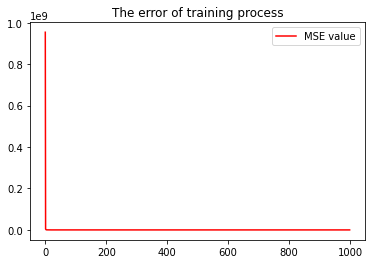

In [45]:
#the training error figure
s = range(1000)
plt.plot(s,error,color="red",label = "MSE value")
plt.legend()
plt.title('The error of training process')
plt.show()

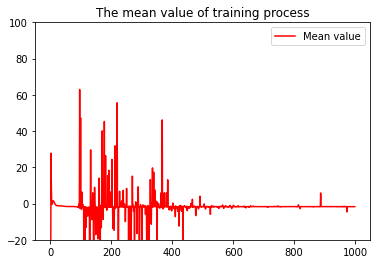

In [47]:
s = range(1000)
plt.plot(s,mean_list,color="red",label = "Mean value")
plt.ylim((-20, 100))
plt.legend()
plt.title('The mean value of training process')
plt.show()

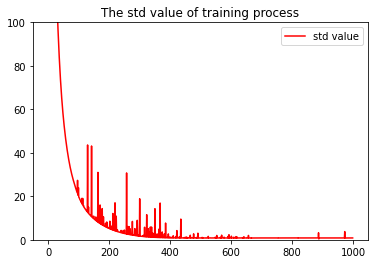

In [49]:
s = range(1000)
plt.plot(s,std_list,color="red",label = "std value")
plt.ylim((0, 100))
plt.legend()
plt.title('The std value of training process')
plt.show()

In [50]:
#the mean of train datasets
print('the predicted mean value of train datasets is ',np.mean(predict_1))
print('the predicted std value of train datasets is ',np.std(predict_1))
print('the predicted mean value of test datasets is ',np.mean(test_predict_1))
print('the predicted std value of test datasets is ',np.std(test_predict_1))

the predicted mean value of train datasets is  -1.7246127
the predicted std value of train datasets is  1.0253775
the predicted mean value of test datasets is  -1.7269853
the predicted std value of test datasets is  1.0238245


In [51]:
print('the groundtruth mean value of train datasets is ',np.mean(Y_train_2))
print('the groundtruth std value of train datasets is ',np.std(Y_train_2))
print('the groundtruth mean value of test datasets is ',np.mean(Y_test_2))
print('the groundtruth std value of test datasets is ',np.std(Y_test_2))

the groundtruth mean value of train datasets is  -1.7500117218944697
the groundtruth std value of train datasets is  1.2019767175426859
the groundtruth mean value of test datasets is  -1.7590099241354975
the groundtruth std value of test datasets is  1.2066587686431909


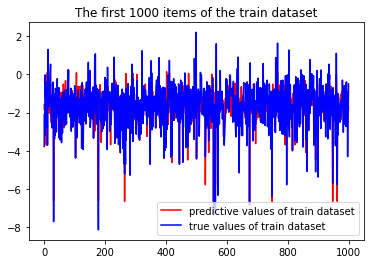

In [52]:
#results display
predict=predict_1.ravel()
orange=y_data.ravel()
t = np.arange(1000)
plt.plot(t,predict[0:1000],color="red",label='predictive values of train dataset')
plt.plot(t,orange[0:1000],color="blue",label='true values of train dataset')
plt.legend()
plt.title('The first 1000 items of the train dataset')
plt.show()

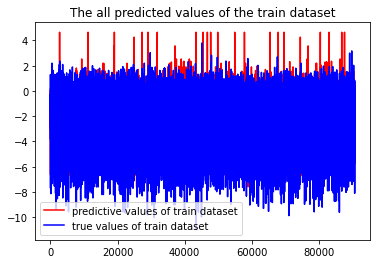

In [53]:
t = np.arange(data_size)
plt.plot(t,predict,color="red",label='predictive values of train dataset')
plt.plot(t,orange,color="blue",label='true values of train dataset')
plt.legend()
plt.title('The all predicted values of the train dataset')
plt.show()

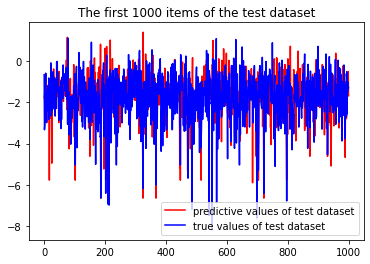

In [54]:
#test dataset results display
y_test_true = Y_test_2.ravel()
t = np.arange(1000)
plt.plot(t,test_predict_1[0:1000],color="red",label='predictive values of test dataset')
plt.plot(t,y_test_true[0:1000],color="blue",label='true values of test dataset')
plt.legend()
plt.title('The first 1000 items of the test dataset')
plt.show()

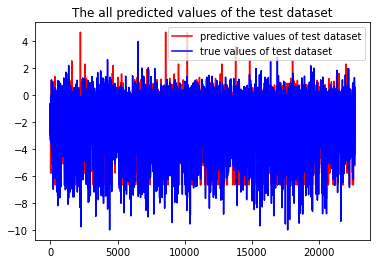

In [55]:
t = np.arange(Y_test_2.shape[0])
plt.plot(t,test_predict_1,color="red",label='predictive values of test dataset')
plt.plot(t,y_test_true,color="blue",label='true values of test dataset')
plt.legend()
plt.title('The all predicted values of the test dataset')
plt.show()

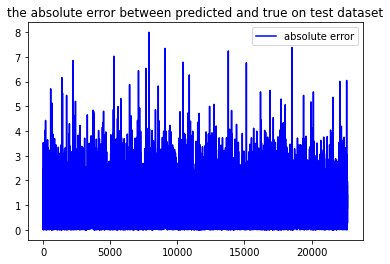

In [56]:
t = np.arange(Y_test_2.shape[0])
abs_error = np.abs(Y_test_2.ravel() - test_predict_1.ravel())
plt.plot(t,abs_error,color = "blue", label = "absolute error")
plt.legend()
plt.title("the absolute error between predicted and true on test dataset")
plt.show()

In [58]:
train_pred_mean = np.mean(predict_1)
train_pred_std = np.std(predict_1)
train_true_mean = np.mean(Y_train_2)
train_true_std = np.std(Y_train_2)
print(train_pred_mean,train_pred_std)
print(train_true_mean,train_true_std)

-1.7246127 1.0253775
-1.7500117218944697 1.2019767175426859


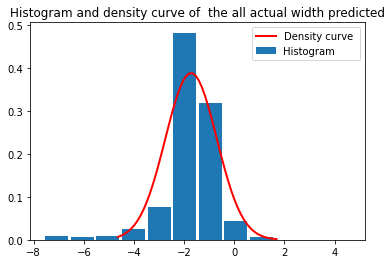

In [59]:
import scipy.stats as st 
s=np.random.normal(train_pred_mean, train_pred_std, 500)
s_fit = np.linspace(s.min(), s.max())
plt.plot(s_fit, st.norm(train_pred_mean, train_pred_std).pdf(s_fit), lw=2, c='r',label = "Density curve ")
plt.hist(predict_1,bins=12,rwidth =0.9,density=True,label = "Histogram")
plt.title("Histogram and density curve of  the all actual width predicted")
plt.legend()
plt.show()

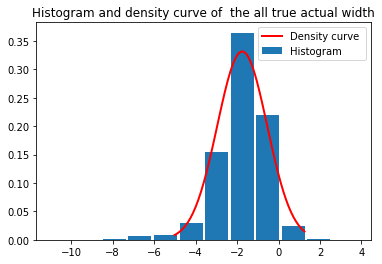

In [60]:
s=np.random.normal(train_true_mean, train_true_std, 500)
s_fit = np.linspace(s.min(), s.max())
plt.plot(s_fit, st.norm(train_true_mean,  train_true_std).pdf(s_fit), lw=2, c='r',label = "Density curve ")
plt.hist(Y_train_2,bins=12,rwidth =0.9,density=True,label = "Histogram")
plt.title("Histogram and density curve of  the all true actual width")
plt.legend()
plt.show()

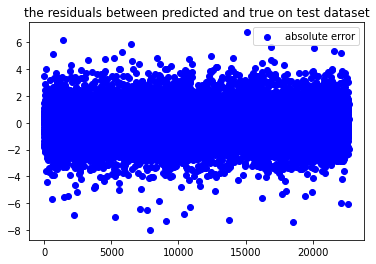

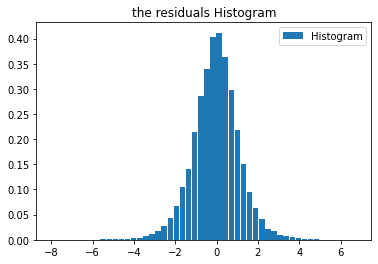

In [61]:
t = np.arange(Y_test_2.shape[0])
residuals = Y_test_2.ravel()-test_predict_1.ravel()
plt.scatter(t,residuals,color = "blue", label = "absolute error")
plt.legend()
plt.title("the residuals between predicted and true on test dataset")
plt.show()
plt.hist(residuals, bins=50,rwidth =0.9,density=True, label = "Histogram" )
plt.legend()
plt.title("the residuals Histogram")
plt.show()

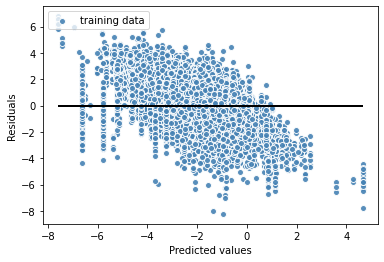

In [63]:
#残差分布图 
plt.scatter(predict_1,Y_train_2.ravel()-predict_1.ravel(), c='steelblue',edgecolor='white',marker='o',alpha=0.9, label='training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=predict_1.min(), xmax=predict_1.max(), lw=2, color='black')
plt.show()

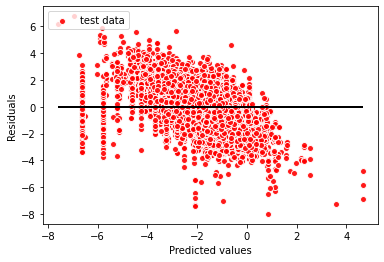

In [64]:
#残差分布图
plt.scatter(test_predict_1,Y_test_2.ravel()-test_predict_1.ravel(), c='red',edgecolor='white',marker='o',alpha=0.9, label='test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=test_predict_1.min(), xmax=test_predict_1.max(), lw=2, color='black')
plt.show()